# Importing Libraries

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#Reading Dataset
data=pd.read_csv('diabetes.csv')
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [5]:
data.shape

(768, 9)

# EDA 

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


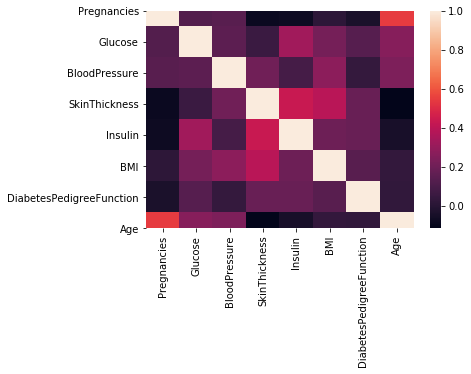

In [7]:
correlation=data.corr()
#print(correlation)
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

neg    500
pos    268
Name: Diabetes, dtype: int64


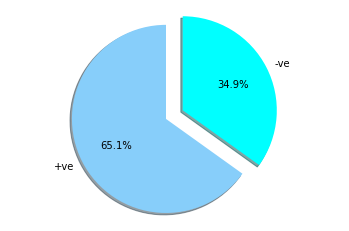

In [8]:
count = pd.value_counts(data['Diabetes'])
print(count)
labels = '+ve', '-ve'
sizes = [count[0], count[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

# Data Pre-Processing

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Diabetes                    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [21]:
x=data.iloc[:,:8]
y=data['Diabetes']
x=x.values
y=y.values

In [22]:
#x=x.values
x.shape

(768, 8)

In [23]:
y.shape


(768,)

# Checking for missing Values

In [24]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [25]:
#NO missing values

# Encoding Categorical Text Variables

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
print(y)
print('Before encode :',y.size)
y=encoder.fit_transform(y)
print('After encode :',y.size)

['pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos'
 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos'
 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg'
 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg'
 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg'
 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg'
 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg'
 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg'
 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg'
 'pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos'
 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos'
 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'p

In [27]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

# Spliiting the data into Train and Test

In [19]:
#!pip install sciket-learn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=41)

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
sc=StandardScaler()

In [30]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Models

1.Logistic regression      
2.K-Nearest Neighbor      
3.Naive Bayes   
4.Random Forest

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [45]:
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
acc=accuracy_score(pred,y_test)
print('Accuracy: ',acc)

Accuracy:  0.7662337662337663


C:\Users\venka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# K-Nearest Neighbor 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [50]:
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc=accuracy_score(pred,y_test)
print("Accuracy",acc)

Accuracy 0.7532467532467533


# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
pred=NB.predict(x_test)
acc=accuracy_score(pred,y_test)
print("Accuracy ",acc)

Accuracy  0.7272727272727273


In [53]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
acc=accuracy_score(pred,y_test)
print("Accuracy ",acc)

Accuracy  0.7532467532467533


C:\Users\venka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
